In [ ]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [130]:
import numpy as np
import pandas as pd

from scipy import stats
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense
from tensorflow.keras.optimizers import Adam

In [131]:
train_data = pd.read_csv('/content/drive/MyDrive/KDT/data/Titanic/train.csv')

display(train_data.head())
train_data.info()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [132]:
df = train_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
# print(df)

df = df.dropna(subset=['Age'], axis=0, how='any')
print(df)
df.info()

     Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0           0       3    male  22.0      1      0   7.2500        S
1           1       1  female  38.0      1      0  71.2833        C
2           1       3  female  26.0      0      0   7.9250        S
3           1       1  female  35.0      1      0  53.1000        S
4           0       3    male  35.0      0      0   8.0500        S
..        ...     ...     ...   ...    ...    ...      ...      ...
885         0       3  female  39.0      0      5  29.1250        Q
886         0       2    male  27.0      0      0  13.0000        S
887         1       1  female  19.0      0      0  30.0000        S
889         1       1    male  26.0      0      0  30.0000        C
890         0       3    male  32.0      0      0   7.7500        Q

[714 rows x 8 columns]
<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    -------

In [133]:
df['Embarked'].fillna(method='ffill', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Pclass    714 non-null    int64  
 2   Sex       714 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     714 non-null    int64  
 5   Parch     714 non-null    int64  
 6   Fare      714 non-null    float64
 7   Embarked  714 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.2+ KB


<ipython-input-133-75ea910058ec>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(method='ffill', inplace=True)
<ipython-input-133-75ea910058ec>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Embarked'].fillna(method='ffill', inplace=True)


In [134]:
t_data = df[['Survived']].values.reshape(-1, 1)
df.drop('Survived', axis=1, inplace=True)
x_data = df
x_data = df.dropna(subset=['Age'], how='any', axis=0)


display(x_data.shape)
display(t_data.shape)
display(x_data)

(714, 7)

(714, 1)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
885,3,female,39.0,0,5,29.1250,Q
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
889,1,male,26.0,0,0,30.0000,C


In [135]:
x_data['Sex'] = x_data.apply(lambda x_data : 0 if x_data['Sex'] == 'female' else 1, axis=1)
display(x_data)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,S
1,1,0,38.0,1,0,71.2833,C
2,3,0,26.0,0,0,7.9250,S
3,1,0,35.0,1,0,53.1000,S
4,3,1,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
885,3,0,39.0,0,5,29.1250,Q
886,2,1,27.0,0,0,13.0000,S
887,1,0,19.0,0,0,30.0000,S
889,1,1,26.0,0,0,30.0000,C


In [136]:
x_data['Embarked'] = x_data['Embarked'].map({'S' : 0, 'C' : 1, 'Q' : 2})
display(x_data)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,0
1,1,0,38.0,1,0,71.2833,1
2,3,0,26.0,0,0,7.9250,0
3,1,0,35.0,1,0,53.1000,0
4,3,1,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...
885,3,0,39.0,0,5,29.1250,2
886,2,1,27.0,0,0,13.0000,0
887,1,0,19.0,0,0,30.0000,0
889,1,1,26.0,0,0,30.0000,1


In [137]:
print(np.unique_counts(x_data['Embarked']))

UniqueCountsResult(values=array([0, 1, 2]), counts=array([554, 132,  28]))


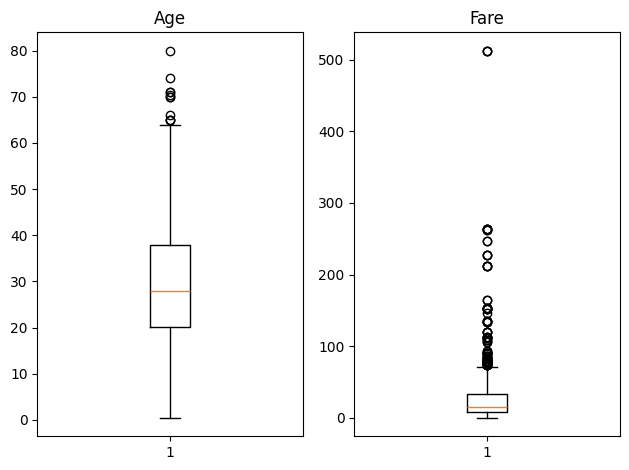

In [138]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)


ax1.set_title('Age')
ax2.set_title('Fare')


ax1.boxplot(df['Age'])
ax2.boxplot(df['Fare'])

plt.tight_layout()
plt.show()

In [139]:
scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

In [ ]:
model = Sequential()

model.add(Flatten(input_shape=(7,)))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(x_data_norm, t_data,
          epochs=1000, verbose=1,
          validation_split=0.2,
          batch_size=100)
# Epoch 1000/1000
# 6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - acc: 0.7688 - loss: 0.5781 - val_acc: 0.7972 - val_loss: 0.5492

In [218]:
test_data = pd.read_csv('/content/drive/MyDrive/KDT/data/Titanic/test.csv')

display(test_data.head())
test_data.info()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [219]:
df = test_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
# print(df)

mean_age = df['Age'].mean(axis=0) # NaN값을 제외하고 평균 계산
df['Age'].fillna(mean_age, inplace=True)

print(df['Age'])

0      34.50000
1      47.00000
2      62.00000
3      27.00000
4      22.00000
         ...   
413    30.27259
414    39.00000
415    38.50000
416    30.27259
417    30.27259
Name: Age, Length: 418, dtype: float64


<ipython-input-219-84c50b8f1503>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(mean_age, inplace=True)


In [220]:
df['Embarked'].fillna(method='ffill', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


<ipython-input-220-75ea910058ec>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(method='ffill', inplace=True)
<ipython-input-220-75ea910058ec>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Embarked'].fillna(method='ffill', inplace=True)


In [221]:
x_data_test = df.dropna(subset=['Age'], how='any', axis=0)

display(x_data_test.shape)

(418, 7)

In [222]:
x_data_test['Sex'] = x_data_test.apply(lambda x_data_test : 0 if x_data_test['Sex'] == 'female' else 1, axis=1)
display(x_data_test)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.50000,0,0,7.8292,Q
1,3,0,47.00000,1,0,7.0000,S
2,2,1,62.00000,0,0,9.6875,Q
3,3,1,27.00000,0,0,8.6625,S
4,3,0,22.00000,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500,S
414,1,0,39.00000,0,0,108.9000,C
415,3,1,38.50000,0,0,7.2500,S
416,3,1,30.27259,0,0,8.0500,S


In [223]:
x_data_test['Embarked'] = x_data_test['Embarked'].map({'S' : 0, 'C' : 1, 'Q' : 2})
display(x_data_test)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.50000,0,0,7.8292,2
1,3,0,47.00000,1,0,7.0000,0
2,2,1,62.00000,0,0,9.6875,2
3,3,1,27.00000,0,0,8.6625,0
4,3,0,22.00000,1,1,12.2875,0
...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500,0
414,1,0,39.00000,0,0,108.9000,1
415,3,1,38.50000,0,0,7.2500,0
416,3,1,30.27259,0,0,8.0500,0


In [224]:
scaler = MinMaxScaler()
scaler.fit(x_data_test)
x_data_test_norm = scaler.transform(x_data_test)

In [225]:
predictions = model.predict(x_data_test_norm[:])

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [226]:
predicted_df = pd.DataFrame(predictions, columns=['Survived'])

In [227]:
display(predicted_df.head())

,Survived
0,0.412177
1,0.531823
2,0.404237
3,0.276153
4,0.540448


In [228]:
predicted_df['Survived'] = predicted_df.apply(lambda predicted_df : 1 if predicted_df['Survived'] > 0.5 else 0, axis=1)
display(predicted_df)

,Survived
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [229]:
test_data = pd.read_csv('/content/drive/MyDrive/KDT/data/Titanic/test.csv')
id_df = test_data['PassengerId']
display(id_df)

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [230]:
ans = pd.concat([id_df, predicted_df], axis=1)
display(ans)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [232]:
ans.to_csv('predictions.csv', index=False)